# Statistics Reference Notebook

## Definitions

- Discrete random variables:
    - random variables that can only take on discrete values (coin toss)
- Continuous random variables:
    - random variables that can take on an infinite number of values (masses of rocks)
- Probability distributions:
    - a mathematical description of outcomes
- Cumulative density function:
    - the probability of observing any specific value, $x$, *or* any value less than $x$, hence 'cumulative'
- Probability density function:
    - for continuous random variables, probability of observing any specific value $x$
    - note that this is the derivative of the CDF
    - EX: exponential, gamma, pareto, normal, etc.
- Probability mass function: 
    - the set of probabilities of discrete outcomes
    - similar to PDF, but for discrete random variables, 
    - EX: binomial, hypergeometric, Poisson, geometric, etc.

## Summary Statistics

When using `df.describe()` a statistical summary of the DataFrame is returned. 
<br>

- Count:
    - When used against a Series, returns a scalar integer of the number of non-null values
    - When used against a DataFrame, returns a list of scalar integers as for Series 
- Mean:
    - Computes the average, susceptible to influence from outliers
- Median:
    - The middle value of a dataset, immune to influence from outliers
- Standard Deviation:
    - Computes the standard deviation, a measure of the 'spread' of the data 
- Minimum:
    - Computes the minimum. When used on a string, returns the first alphabetical 
- Maximum:
    - Computes the maximum. When used on a string, returns the last alphabetical 

## Quantiles, Quartiles, Percentiles

Percentiles and quartiles are examples of quantiles.

A note on quantiles: the qth quantile of a dataset splits the data into two sets. One with the fraction q of smaller observations and one with larger observations.

- 25%, first quartile:
    - Computes the first quartile
- 50%, median / second quartile:
    - Computes the median
- 75%, third quartile:
    - Computes the third quartile
    
|   quartile   |   quantile    |   percentile   |
|--------------|---------------|----------------|
| 0 quartile   |  0   quantile |  0 percentile  |
| 1 quartile   | 0.25 quantile | 25 percentile  |
| 2 quartile   | 0.50 quantile | 50 percentile  |
| 3 quartile   | 0.75 quantile | 75 percentile  |
| 4 quartile   |  1 quantile   | 100 percentile |

## Variance and Standard Deviation

The variance and standard deviation quantify the 'spread' of the data. These are easily computable with numpy functions `np.var()` and `np.std()`.

In [33]:
# works
variance = np.var(petal_length)
print(f'variance: \t\t{variance}')
std = np.std(petal_length)
print(f'standard deviation: \t{std}')

variance: 		0.21640000000000004
standard deviation: 	0.4651881339845203


## Covariance and Pearson Coefficient

Covariance is a measure of how two quantities vary *together*. If x is high when y is high, then x and y are positively correlated. If x is high when y is low (or vice-versa), then x and y are negatively correlated.

<p></p><img src="images/covar.png" width="350"><p></p>

The Pearson correlation coefficient is a dimensionless version of the covariance obtained by dividing the covariance by the standard deviation of both x and y. It has a value between +1 and -1, where 1 is total positive linear correlation, 0 is no linear correlation, and -1 is total negative linear correlation.

$$ \rho = \frac{cov(x,y)}{\sigma_x\sigma_y } = \frac{\textrm{variability due to codependence}}{\textrm{independent variability}} $$

Here is an example showing different pearson coefficients:

<p></p><img src="images/pearco.png"><p></p>

Covariance can be computed using the numpy function `np.cov()`. This function returns a covariance matrix identifying the self variance (`[0,0]` or `[1,1]`) and covariance (`[0,1]` or `[1,0]`). 

In [29]:
# works
cov_mat = np.cov(petal_length, petal_width)
print(f'covariance matrix: \n{cov_mat}')
petal_cov = covariance_matrix[0,1]
print(f'petal covariance: \n  {petal_cov}')

covariance matrix: 
[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
petal covariance: 
  0.07310204081632653


The Pearson coefficient is often easier to interpret than the covariance and can be computed using the numpy function `np.corrcoef()`. This function returns a matrix similar to the covariance matrix. Here, the values at `[0,0]` and `[1,1]` must equal `1` as this is the variance with itself. The value at `[0,1]` is what we are interested in.

In [30]:
# works
corr_mat = np.corrcoef(petal_length,petal_width)
r = corr_mat[0,1]
print(f'Pearson coefficient: {r}')

Pearson coefficient: 0.7866680885228169


## Z-Scores

Using the zscore function, you can apply a `.transform()` method after grouping to apply a function to groups of data independently. The z-score is also useful to find outliers: a z-score value of +/- 3 is generally considered to be an outlier.

In [ ]:
# no working data
from scipy.stats import zscore
df.groupby('region')['life','fertility'].transform(zscore)

## Histograms

Histograms are useful for visualizing the distribution of data for a given measurement.

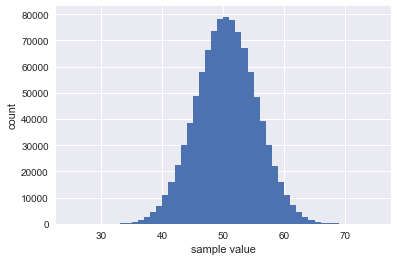

In [61]:
np.random.seed(45)
samples = np.random.binomial(100,0.5,1000000)

_ = plt.hist(samples,bins=50)
plt.xlabel('sample value')
plt.ylabel('count')
plt.show()

### Bins

Bins can make a significant difference on the representation of the data, this is referred to as 'binning bias'. The default number of bins in `matplotlib.pyplot` is 10.

The 'square root rule' is a commonly used rule of thumb for choosing the number of bins: choose the number of bins to be the square root of the number of samples.

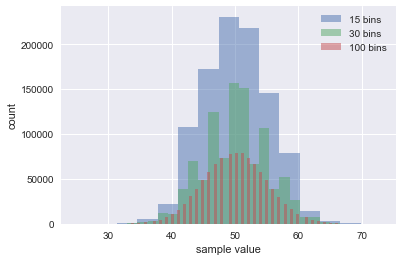

In [69]:
np.random.seed(30)
samples = np.random.binomial(100,0.5,1000000)

_ = plt.hist(samples,bins=15,alpha=0.5)
_ = plt.hist(samples,bins=30,alpha=0.5)
_ = plt.hist(samples,bins=100,alpha=0.5)
plt.xlabel('sample value')
plt.ylabel('count')
plt.legend(('15 bins','30 bins','100 bins'))
plt.show()

## Bee swarm plots

In order to avoid binning bias, a bee swarm plot can be used to show the data 'as is'. Note that bee swarm plots can lose their value when the number of data points grows too large. In that case you can use a box plot or an ECDF.

In [ ]:
# no working data
_ = sns.swarmplot(x='species',y='petal length (cm)',data=df)
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')
plt.show()

<p></p><img src="images/bee_swarm.png"><p></p>

## ECDF

The empirical cumulative distribution function (ECDF) is a CDF constructed from non-simulated data. The x-axis is the sorted data, the y-axis is a set of evenly spaced data points from 0 to 1. You can also plot multiple ECDFs to compare to each other by calling `plt.plot()` multiple times. A function to calculate the ECDF is given below, followed by an example.

In [70]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    return x,y

In [ ]:
# no working data
x = np.sort(df_swing['dem_share'])
y = np.arrange(1, len(x)+1)/len(x)

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('ECDF')
plt.margins(0.02) # padding
plt.show()

<p></p><img src="images/ecdf1.png"><p></p>

This plot can be read as: <br>
>20% of counties had 36% or less vote for Obama

## Box Plots

Box plots are useful for summarizing a large amount of data by it's percentiles. Here is a summary of it's features:
- the center of the box represents the median (50th percentile)
- the upper end of the box represents the 75th percentile
- the lower end of the box represents the 25th percentile
- the total height of the box contains the middle 50% of the data and is called the interquartile range (IQR)
- the whiskers extend 1.5 * IQR or to the extent of the data, whichever is less extreme
- all data beyond the whiskers are plotted as points and referred to as outliers
- data points > 2.0 * IQR are generally accepted as outliers

<p></p><img src="images/box_plot.png"><p></p>


In [ ]:
# no working data
_ = sns.boxplot(x='species',y='petal length (cm)',data=df)
plt.xlabel('species')
plt.ylabel('petal length (cm)')
plt.show()

## Data Simulation

Hacker statistics uses simulated repeated measurements to compute probabilities as opposed to classical pen and paper statistics. This is similar to a numerical solution versus an analytical one.

As an example, a binomial distribution with a probability of 50% was used to simulate 100 coin tosses 10,000 times returning an array with the number of successes for each iteration.

**Remember**, *if you can simulate a story, you can get it's distribution.*

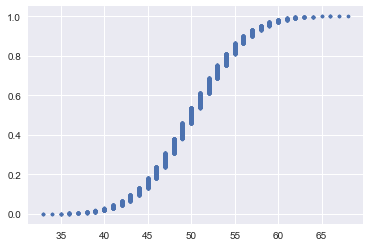

In [12]:
data = np.random.binomial(n=100,p=0.5,size=10000)
x = np.sort(data)
y = np.arange(1,len(data)+1)/len(data)

_ = plt.plot(x,y,marker='.',linestyle='none')
plt.show()

### Binomial PMF

Here we will use a histogram for simplicity.

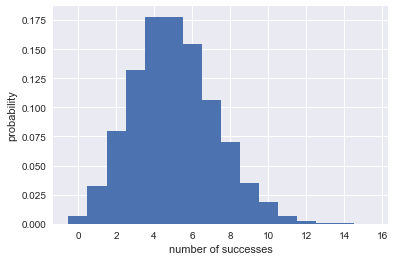

In [26]:
data = np.random.binomial(n=100,p=0.05,size=10000)
# this bin setup allows centering on integers
bins = np.arange(0, max(data)+1.5) - 0.5

_ = plt.hist(data,bins=bins,density=True)
_ = plt.xlabel('number of successes')
_ = plt.ylabel('probability')
plt.show()

### Poisson CDF 

The timing of one event is completely independent from the timing of any other event. Examples would be meteor strikes and hits on a website - these can be described as an average per day, but predicting the time that any one will occur is independent of the last one.

A more detailed explanation: <br>
The Poisson distribution is a limit of the Binomial distribution for rare events. Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, so we would expect to get about 6 successes. This is similar to Poisson, where we get on average 6 hits on a website per hour. So, the Poisson distribution with arrival rate equal to $np$ approximates a Binomial distribution for $n$ Bernoulli trials with probability $p$ of success (with $n$ large and $p$ small).

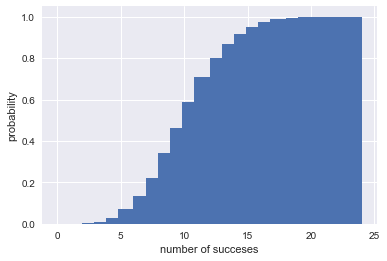

In [30]:
data = np.random.poisson(10,10000)

_ = plt.hist(data,bins=int(np.sqrt(len(data))),cumulative=True,density=True)
_ = plt.xlabel('number of succeses')
_ = plt.ylabel('probability')
plt.show()

### Normal PDF

The normal distribution is also referred to as the Gaussian distribution. Be cautious, even though a distrubtion may appear normally distrubted at first, in many cases it is not. When in doubt, check the normal CDF.

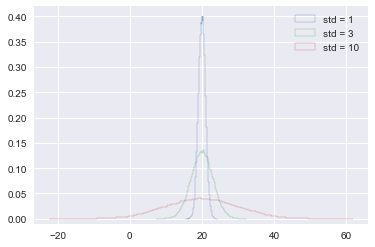

In [6]:
samples_std1 = np.random.normal(20,1,size=100000)
samples_std3 = np.random.normal(20,3,size=100000)
samples_std10 = np.random.normal(20,10,size=100000)

_ = plt.hist(samples_std1,density=True,histtype='step',bins=100)
_ = plt.hist(samples_std3,density=True,histtype='step',bins=100)
_ = plt.hist(samples_std10,density=True,histtype='step',bins=100)
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

### Normal CDF


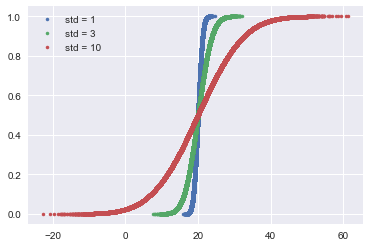

In [97]:
samples_std1 = np.random.normal(20,1,size=100000)
samples_std3 = np.random.normal(20,3,size=100000)
samples_std10 = np.random.normal(20,10,size=100000)

x_std1,y_std1 = ecdf(samples_std1)
x_std3,y_std3 = ecdf(samples_std3)
x_std10,y_std10 = ecdf(samples_std10)
bins = int(np.sqrt(len(x_std1)))

_ = plt.plot(x_std1,y_std1,marker='.',linestyle='none')
_ = plt.plot(x_std3,y_std3,marker='.',linestyle='none')
_ = plt.plot(x_std10,y_std10,marker='.',linestyle='none')
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='upper left')
plt.show()

To compare the CDF of a given distribution to that of a normally distributed CDF with the same mean and standard deviation, use the following technique.

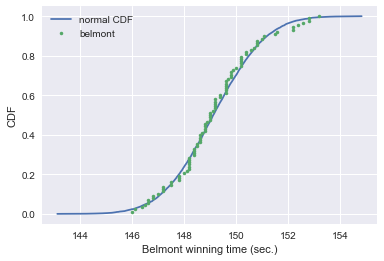

In [36]:
mu = np.mean(belmont)
sigma = np.std(belmont)
samples = np.random.normal(mu,sigma,size=10000)

x_theor = np.sort(samples)
y_theor = np.arange(1,len(samples)+1)/len(samples)
x = np.sort(belmont)
y = np.arange(1,len(belmont)+1)/len(belmont)

_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
_ = plt.legend(('normal CDF','belmont'), loc='upper left')
plt.show()

As a fun extension, let's calculate the chances of a horse matching or beating the legendary Secretariat's record. In order to do this, we need to assume that the `belmont` data is normally distributed.

In [37]:
mu = np.mean(belmont)
sigma = np.std(belmont)
samples = np.random.normal(mu,sigma,size=1000000)

prob = sum(samples <= 144)/len(samples)
print(f'Probability of beating Secretariat: {prob}')

Probability of beating Secretariat: 0.000638


### Exponential Distribution

If the timing of an event can be described by a Poisson process, then the tie between events is exponentially distributed. The exponential distribution has a single parameter, $\tau$, that describes the typical interval time. 

The example below attempts to match actual data from the time between 'no-hitters' in MLB to an exponential distribution to verify.

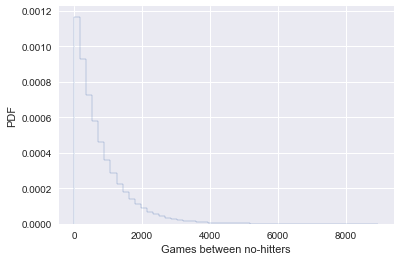

In [3]:
np.random.seed(42)
tau = np.mean(nohitter_times)
samples = np.random.exponential(tau, 100000)

_ = plt.hist(samples,bins=50,density=True,histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')
plt.show()

Now let's plot the CDF and ECDF so we can verify our distribution. We will also compute theoreticals for $2\tau$ and $\frac{1}{2}\tau$ to verify our intial parameter was optimal. 

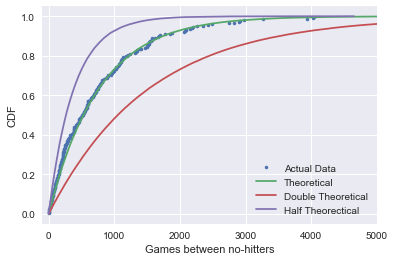

In [16]:
samples_double = np.random.exponential(2*tau,100000)
samples_half = np.random.exponential(0.5*tau,100000)

x,y = ecdf(nohitter_times)
x_theor,y_theor = ecdf(samples)
xdub_t,ydub_t = ecdf(samples_double)
xhalf_t,yhalf_t = ecdf(samples_half)

_ = plt.plot(x,y,marker='.',linestyle='none')
_ = plt.plot(x_theor,y_theor)
_ = plt.plot(xdub_t,ydub_t)
_ = plt.plot(xhalf_t,yhalf_t)
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('CDF')
_ = plt.legend((
    'Actual Data','Theoretical','Double Theoretical','Half Theorectical')
    ,loc='lower right')
plt.xlim(-100, 5000)
plt.show()

## Linear Regression

Regressions are functions that can be used to represent a given set of data. Often times a linear regression, a line with a slope and intercept, is sufficient. 

Once a regression has been fitted, several methods can be used to determine the quality of the 'fit'. Here we will use the least squares method which minimizes the sum of the squares of the residuals, where residuals are the distances between the data points and the regression.

Numpy has a great function `np.polyfit()` which can also be used for linear regressions by setting the degree argument, `deg` equal to `1`. This function optimizes using RSS (residual sum of squares).

In the following example we will look at literacy vs. fertility for women in the world.

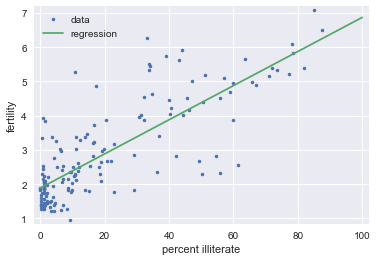

In [20]:
a,b = np.polyfit(illiteracy,fertility,1)
x = np.array([0,100])
y = a*x + b

_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
_ = plt.plot(x, y)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')
_ = plt.legend(('data','regression'))
plt.margins(0.02)
plt.show()

## Anscombe's quartet

A word of caution on blindly performing parameter estimation. The four plots below all have the same parameters, but are clearly different.

<p></p><img src="images/ans_ex.png" width="500"><p></p>

## Bootstrapping

Bootsrapping is the use of resampled data to perform statistical inference. This is useful in situations where running experiments to collect data a large number of times is not practical. 

### Bootstrap replicates

Each resampled array is called a bootstrap sample and summary statistics from this resampled array is a boostrap replicate. Once again, numpy has a great function that makes resampling easy, `np.random.choice()`. 

The example below looks at annual rainfall data measured at the Sheffield Weather Station in the UK from 1883 to 2015.

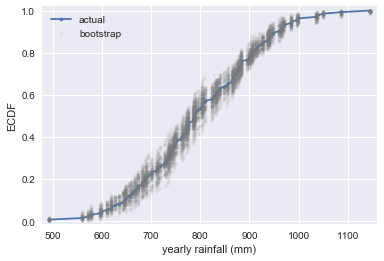

In [22]:
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

for i in range(50):
    bs_sample = np.random.choice(rainfall, size=len(rainfall))
    x, y = ecdf(bs_sample)
    _ = plt.plot(x,y,marker='.',linestyle='none',color='gray',alpha=0.1)

_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('actual','bootstrap'))
plt.margins(0.02)
plt.show()

### Bootstrap confidence intervals

The $p\%$ confidence interval is defined as the interval where $p\%$ of the observed values would lie if we repeated the measurements many times.

Stated another way, the 95% confidence interval for the means is where 95% of the means lie. Again, numpy function `np.percentile()` makes this easy.

In [25]:
bs_sample = np.random.choice(rainfall, size=len(rainfall))
conf_int = np.percentile(bs_sample,[2.5,97.5])
print(f'95% CI: {conf_int}')

95% CI: [ 572.4  1022.09]


## Standard error of the mean (SEM)

When replicating, it can be shown theoretically that under not-too-restrictive conditions, the value of the mean will always be Normally distributed. (This does not hold in general, just for the mean and a few other statistics.) The standard deviation of this distribution, called the standard error of the mean, or SEM, is given by the standard deviation of the data divided by the square root of the number of data points. I.e., for a data set, `data`:
> `sem = np.std(data) / np.sqrt(len(data))`

In [24]:
sem = np.std(rainfall)/np.sqrt(len(rainfall))
print(f'SEM: {sem}')

SEM: 10.510549150506188


## Hypothesis Testing

How do we assess how well our observed data are actually described by the model? This is where hypothesis testing comes in. Typically, you will formulate a hypothesis and then use the observed data to validate it. The hypothesis you are testing is referred to as the null hypothesis.

A common method for testing a hypothesis that two distributions are identical is called permutation. Start by combining the two data sets `A` and `B`, then scramble the order and abritrarily assign them back to `A` and `B`, say the first half gets assigned to `A` and the second to `B`. We can create many permutations in this fashion and plot their ECDF alongside the ECDF for the original `A` and `B`. If the two distributions were identical the permuted data should overlap the observed data.

Numpy function `np.random.permutation()` allows for easy permuting. 

The plot below shows an example where the distributions are not identical.

<p></p><img src="images/perm_ex.png" width="400"><p></p>

### Test statistics

Instead of relying on a visual comparison, a test statistic such as the mean, standard deviation, etc. can be used for comparison to validate the null hypothesis. When performing a hypothesis test, your choice of test statistic should be pertinent to the question you are seeking to answer.

More generally, it is a single number that can be computed from observed data and from data you simulate under the null hypothesis.

### p-value

The p-value is the probability of obtaining a value of your test statistic that is at least as extreme as what was observed, under the assumption the null hypothesis is true. It is ***not*** the probability that the null hypothesis is true.

Stated another way, the p-value is the probability of observing a test statistic equally or more extreme than the one you observed, given that the null hypothesis is true.

When the p-value is small, it is often said that the data are *statisically, significantly different* than what we would observe under the null hypothesis. For this reason, hypothesis testing in this fashion is sometimes referred to as null hypothesis significance testing (NHST). 

>***Remember***, statistical significance `!=` practical significance.

An example for interpreting p-values:<br>
>Suppose that a vaccine study produced a p-value of 0.04. This p-value indicates that if the vaccine had no effect, you’d obtain the observed difference or more in 4% of studies due to random sampling error.

There is a great writeup on how to correctly interpret p-values [here](http://blog.minitab.com/blog/adventures-in-statistics-2/how-to-correctly-interpret-p-values).

### General hypothesis testing flow

A generic format for the process of hypothesis testing is shown below:
- clearly state the null hypothesis
- define your test statistic
- generate many sets of simulated data assuming the null hypothesis is true
- compute the test statistic for each simulated data set
- the p-value is the fraction of your simulated data sets for which the test statistic is at least as extreme as in the real data

### One-sample bootsrap hypothesis test

In some cases, you may only have one sample for comparison instead of an entire set of measurements. In this case you can shift the set of measurements such that it's mean matches the one sample. From there, you can bootstrap and compute the p-value. The following is a description of the process.

>Another juvenile frog was studied, Frog C, and you want to see if Frog B and Frog C have similar impact forces. Unfortunately, you do not have Frog C's impact forces available, but you know they have a mean of 0.55 N. Because you don't have the original data, you cannot do a permutation test, and you cannot assess the hypothesis that the forces from Frog B and Frog C come from the same distribution. You will therefore test another, less restrictive hypothesis: The mean strike force of Frog B is equal to that of Frog C.

>To set up the bootstrap hypothesis test, you will take the mean as our test statistic. Remember, your goal is to calculate the probability of getting a mean impact force less than or equal to what was observed for Frog B if the hypothesis that the true mean of Frog B's impact forces is equal to that of Frog C is true. You first translate all of the data of Frog B such that the mean is 0.55 N. This involves adding the mean force of Frog C and subtracting the mean force of Frog B from each measurement of Frog B. This leaves other properties of Frog B's distribution, such as the variance, unchanged.

## Hypothesis testing examples

The following examples demonstrate hypothesis testing using different methods such as bootstrap replicates and permutations.

### The vote for the Civil Rights Act in 1964

The Civil Rights Act of 1964 was one of the most important pieces of legislation ever passed in the USA. Excluding "present" and "abstain" votes, 153 House Democrats and 136 Republicans voted yea. However, 91 Democrats and 35 Republicans voted nay. Did party affiliation make a difference in the vote?

To answer this question, you will evaluate the hypothesis that the party of a House member has no bearing on his or her vote. You will use the fraction of Democrats voting in favor as your test statistic and evaluate the probability of observing a fraction of Democrats voting in favor at least as small as the observed fraction of 153/244. (That's right, at least as small as. In 1964, it was the Democrats who were less progressive on civil rights issues.) To do this, permute the party labels of the House voters and then arbitrarily divide them into "Democrats" and "Republicans" and compute the fraction of Democrats voting yea.

In [26]:
np.random.seed(42)

# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems) / len(dems)
    return frac

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, 10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)


p-value = 0.0001


### A time-on-website analog

It turns out that you already did a hypothesis test analogous to an A/B test where you are interested in how much time is spent on the website before and after an ad campaign. The frog tongue force (a continuous quantity like time on the website) is an analog. "Before" = Frog A and "after" = Frog B. Let's practice this again with something that is actually a before/after scenario.

We return to the no-hitter data set. In 1920, Major League Baseball implemented important rule changes that ended the so-called dead ball era. Importantly, the pitcher was no longer allowed to spit on or scuff the ball, an activity that greatly favors pitchers. In this problem you will perform an A/B test to determine if these rule changes resulted in a slower rate of no-hitters (i.e., longer average time between no-hitters) using the difference in mean inter-no-hitter time as your test statistic. The inter-no-hitter times for the respective eras are stored in the arrays `nht_dead` and `nht_live`, where "nht" is meant to stand for "no-hitter time."

In [32]:
np.random.seed(42)

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_dead,nht_live)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead,nht_live,diff_of_means,10000)

# Compute and print the p-value: p
p = np.sum(perm_replicates <= nht_diff_obs) / len(perm_replicates)
print('p-val =',p)

p-val = 0.0001


### Hypothesis test on Pearson correlation

The observed correlation between female illiteracy and fertility may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. You will test this hypothesis. To do so, permute the illiteracy values but leave the fertility values fixed. This simulates the hypothesis that they are totally independent of each other. For each permutation, compute the Pearson correlation coefficient and assess how many of your permutation replicates have a Pearson correlation coefficient greater than the observed one.

In [33]:
np.random.seed(42)

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy,fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted,fertility)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


### Do neonicotinoid insecticides have unintended consequences?

You will investigate the effects of neonicotinoid insecticides on bee reproduction. These insecticides are very widely used in the United States to combat aphids and other pests that damage plants.

In a recent study, Straub, et al. (Proc. Roy. Soc. B, 2016) investigated the effects of neonicotinoids on the sperm of pollinating bees. In this and the next exercise, you will study how the pesticide treatment affected the count of live sperm per half milliliter of semen.

First, we will do EDA, as usual. Plot ECDFs of the alive sperm count for untreated bees (stored in the Numpy array `control`) and bees treated with pesticide (stored in the Numpy array `treated`).

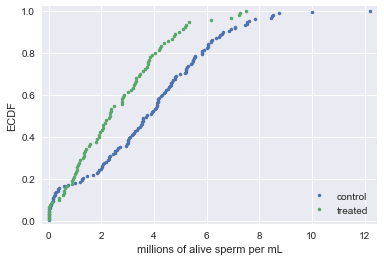

In [35]:
# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()

In [37]:
np.random.seed(42)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

# Compute the difference in mean sperm count: diff_means
diff_means = diff_of_means(control,treated)

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((control,treated)))

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted,
                       np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted,
                       np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)
print('p-value =', p)

p-value = 0.0


### Darwin's finches, a full blown statistical analysis

For your first foray into the Darwin finch data, you will study how the beak depth (the distance, top to bottom, of a closed beak) of the finch species *Geospiza scandens* has changed over time. The Grants have noticed some changes of beak geometry depending on the types of seeds available on the island, and they also noticed that there was some interbreeding with another major species on Daphne Major, *Geospiza fortis*. These effects can lead to changes in the species over time.

In the next few problems, you will look at the beak depth of *G. scandens* on Daphne Major in 1975 and in 2012. To start with, let's plot all of the beak depth measurements in 1975 and 2012 in a bee swarm plot.

The data are stored in a pandas DataFrame called `df` with columns `'year'` and `'beak_depth'`. The units of beak depth are millimeters (mm).

In [53]:
df = pd.DataFrame({'beak_depth':beak_depth,'year':year})
bd_1975 = df[df.year == 1975].beak_depth.values
bd_2012 = df[df.year == 2012].beak_depth.values

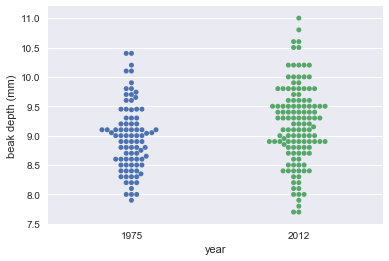

In [45]:
# Create bee swarm plot
_ = sns.swarmplot('year','beak_depth',data=df)

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

# Show the plot
plt.show()

It is kind of hard to see if there is a clear difference between the 1975 and 2012 data set. Eyeballing it, it appears as though the mean of the 2012 data set might be slightly higher, and it might have a bigger variance.

While bee swarm plots are useful, we found that ECDFs are often even better when doing EDA. Plot the ECDFs for the 1975 and 2012 beak depth measurements on the same plot.

For your convenience, the beak depths for the respective years has been stored in the NumPy arrays `bd_1975` and `bd_2012`.

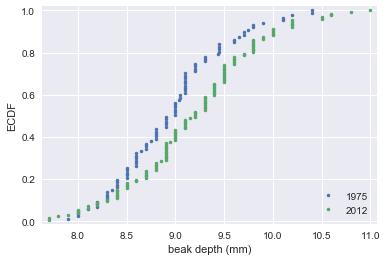

In [54]:
# Compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

The differences are much clearer in the ECDF. The mean is larger in the 2012 data, and the variance does appear larger as well.

Estimate the *difference* of the mean beak depth of the *G. scandens* samples from 1975 and 2012 and report a 95% confidence interval.

In [56]:
np.random.seed(42)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

# Compute the difference of the sample means: mean_diff
mean_diff = diff_of_means(bd_2012,bd_1975)

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975,np.mean,size=10000)
bs_replicates_2012 = draw_bs_reps(bd_2012,np.mean,size=10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates,[2.5,97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.22622047244094645 mm
95% confidence interval = [0.05633521 0.39190544] mm


Your plot of the ECDF and determination of the confidence interval make it pretty clear that the beaks of *G. scandens* on Daphne Major have gotten deeper. But is it possible that this effect is just due to random chance? In other words, what is the probability that we would get the observed difference in mean beak depth if the means were the same?

Be careful! The hypothesis we are testing is not that the beak depths come from the same distribution. For that we could use a permutation test. The hypothesis is that the means are equal. To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.

In [57]:
np.random.seed(42)

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

mean_diff = diff_of_means(bd_2012,bd_1975)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted,np.mean,size=10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted,np.mean,size=10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)


p = 0.0034


The beak length data are stored as `bl_1975` and `bl_2012`, again with units of millimeters (mm). You still have the beak depth data stored in `bd_1975` and `bd_2012`. Make scatter plots of beak depth (y-axis) versus beak length (x-axis) for the 1975 and 2012 specimens.

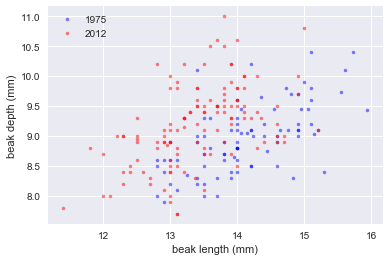

In [60]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

In looking at the plot, we see that beaks got deeper (the red points are higher up in the y-direction), but not really longer. If anything, they got a bit shorter, since the red dots are to the left of the blue dots. So, it does not look like the beaks kept the same shape; they became shorter and deeper.

Perform a linear regression for both the 1975 and 2012 data. Then, perform pairs bootstrap estimates for the regression parameters. Report 95% confidence intervals on the slope and intercept of the regression line.

In [79]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975,1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012,1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = \
        draw_bs_pairs_linreg(bl_1975,bd_1975,size=1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = \
        draw_bs_pairs_linreg(bl_2012,bd_2012,size=1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975,[2.5,97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012,[2.5,97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975,[2.5,97.5])
intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012,[2.5,97.5])

# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)


# need to clean up bl_1975 and bl_2012 to get this to work

TypeError: only integer scalar arrays can be converted to a scalar index

It looks like they have the same slope, but different intercepts.

Now, you will display your linear regression results on the scatter plot, the code for which is already pre-written for you from your previous exercise. To do this, take the first 100 bootstrap samples (stored in `bs_slope_reps_1975`, `bs_intercept_reps_1975`, `bs_slope_reps_2012`, and `bs_intercept_reps_2012`) and plot the lines with `alpha=0.2` and `linewidth=0.5` keyword arguments to `plt.plot()`.

In [ ]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i]*x + bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i]*x + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.show()

The linear regressions showed interesting information about the beak geometry. The slope was the same in 1975 and 2012, suggesting that for every millimeter gained in beak length, the birds gained about half a millimeter in depth in both years. However, if we are interested in the shape of the beak, we want to compare the *ratio* of beak length to beak depth. Let's make that comparison.

In [ ]:
# Compute length-to-depth ratios
ratio_1975 = bl_1975/bd_1975
ratio_2012 = bl_2012/bd_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975,np.mean,size=10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012,np.mean,size=10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975,[0.5,99.5])
conf_int_2012 = np.percentile(bs_replicates_2012,[0.5,99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)

We see the mean beak length to depth ratio was 1.58 in 1975 and 1.47 in 2012. The low end of the 1975 99% confidence interval was 1.56 mm and the high end of the 99% confidence interval in 2012 was 1.49 mm. In addition to these results, what would you say about the ratio of beak length to depth?

Remember, the size of the effect is most important; the p-value is in this case, just the icing on the cake.

The mean beak length-to-depth ratio decreased by about 0.1, or 7%, from 1975 to 2012. The 99% confidence intervals are not even close to overlapping, so this is a real change. The beak shape changed.

The array `bd_parent_scandens` contains the average beak depth (in mm) of two parents of the species *G. scandens*. The array `bd_offspring_scandens` contains the average beak depth of the offspring of the respective parents. The arrays `bd_parent_fortis` and `bd_offspring_fortis` contain the same information about measurements from *G. fortis* birds.

Make a scatter plot of the average offspring beak depth (y-axis) versus average parental beak depth (x-axis) for both species. Use the `alpha=0.5` keyword argument to help you see overlapping points.

In [ ]:
# Make scatter plots
_ = plt.plot(bd_parent_fortis, bd_offspring_fortis,
             marker='.', linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens,
             marker='.', linestyle='none', color='red', alpha=0.5)

# Label axes
_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')

# Add legend
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

# Show plot
plt.show()

It appears as though there is a stronger correlation in *G. fortis* than in *G. scandens*. This suggests that beak depth is more strongly inherited in *G. fortis*. We'll quantify this correlation next.

In an effort to quantify the correlation between offspring and parent beak depths, we would like to compute statistics, such as the Pearson correlation coefficient, between parents and offspring. To get confidence intervals on this, we need to do a pairs bootstrap.

You have already written a function to do pairs bootstrap to get estimates for parameters derived from linear regression. Your task in this exercise is to modify that function to make a new function with call signature `draw_bs_pairs(x, y, func, size=1)` that performs pairs bootstrap and computes a single statistic on the pairs samples defined by `func(bs_x, bs_y)`. In the next exercise, you will use `pearson_r` for func.

In [ ]:
# func in supporting data

The Pearson correlation coefficient seems like a useful measure of how strongly the beak depth of parents are inherited by their offspring. Compute the Pearson correlation coefficient between parental and offspring beak depths for *G. scandens*. Do the same for *G. fortis*. Then, use the function you wrote in the last exercise to compute a 95% confidence interval using pairs bootstrap.

In [ ]:
# Compute the Pearson correlation coefficients
r_scandens = pearson_r(bd_parent_scandens, bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, pearson_r, size=1000)

bs_replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, pearson_r, size=1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(bs_replicates_scandens,[2.5,97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis,[2.5,97.5])

# Print results
print('G. scandens:', r_scandens, conf_int_scandens)
print('G. fortis:', r_fortis, conf_int_fortis)

It is clear from the confidence intervals that beak depth of the offspring of *G. fortis* parents is more strongly correlated with their offspring than their *G. scandens* counterparts.

Remember that the Pearson correlation coefficient is the ratio of the covariance to the geometric mean of the variances of the two data sets. This is a measure of the correlation between parents and offspring, but might not be the best estimate of heritability. If we stop and think, it makes more sense to define heritability as the ratio of the covariance between parent and offspring to the variance of the parents alone. In this exercise, you will estimate the heritability and perform a pairs bootstrap calculation to get the 95% confidence interval.

This exercise highlights a very important point. Statistical inference (and data analysis in general) is not a plug-n-chug enterprise. You need to think carefully about the questions you are seeking to answer with your data and analyze them appropriately. If you are interested in how heritable traits are, the quantity we defined as the heritability is more apt than the off-the-shelf statistic, the Pearson correlation coefficient.

In [ ]:
def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[1,0] / covariance_matrix[0,0]

# Compute the heritability
heritability_scandens = heritability(bd_parent_scandens,bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis,bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(
        bd_parent_scandens,bd_offspring_scandens, heritability, size=1000)
        
replicates_fortis = draw_bs_pairs(
        bd_parent_fortis,bd_offspring_fortis, heritability, size=1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens,[2.5,97.5])
conf_int_fortis = np.percentile(replicates_fortis,[2.5,97.5])

# Print results
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)

Here again, we see that *G. fortis* has stronger heritability than *G. scandens*. This suggests that the traits of *G. fortis* may be strongly incorporated into *G. scandens* by introgressive hybridization.

The heritability of beak depth in *G. scandens* seems low. It could be that this observed heritability was just achieved by chance and beak depth is actually not really heritable in the species. You will test that hypothesis here. To do this, you will do a pairs permutation test.

In [ ]:
# Initialize array of replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted,bd_offspring_scandens)

# Compute p-value: p
p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# Print the p-value
print('p-val =', p)

You get a p-value of zero, which means that none of the 10,000 permutation pairs replicates you drew had a heritability high enough to match that which was observed. This strongly suggests that beak depth is heritable in *G. scandens*, just not as much as in *G. fortis*. If you like, you can plot a histogram of the heritability replicates to get a feel for how extreme of a value of heritability you might expect by chance.

## To Do

1. scrape data locations from [datacamp website for this course](https://www.datacamp.com/courses/statistical-thinking-in-python-part-2)
1. store data in local folder
1. import all the data cleanly
1. re-run this finch analysis

## END: Supporting data

In [80]:
# RUN ME
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    return x,y

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from
    inds = np.arange(len(x))

    # Initialize samples
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Take samples
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds,len(inds))
        bs_x, bs_y = func(bs_x,bs_y)
        bs_replicates[i] = bs_y - bs_x

    return bs_replicates

petal_length = [
    4.7, 4.5, 4.9, 4.0, 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4.0,
    4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4.0, 4.9, 4.7, 4.3, 4.4,
    4.8, 5.0, 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1,
    4.0, 4.4, 4.6, 4.0, 3.3, 4.2, 4.2, 4.2, 4.3, 3.0, 4.1]
petal_width = [
    1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1.0, 1.3, 1.4, 1.0, 1.5, 1.0,
    1.4, 1.3, 1.4, 1.5, 1.0, 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4,
    1.4, 1.7, 1.5, 1.0, 1.1, 1.0, 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3,
    1.3, 1.2, 1.4, 1.2, 1.0, 1.3, 1.2, 1.3, 1.3, 1.1, 1.3]
belmont = [
    148.5, 146.6, 148.5, 150.7, 150.4, 150.8, 151.5, 147.5,
    149.6, 148.4, 147.8, 148.7, 147.5, 148.2, 149.7, 146.5,
    151.1, 147.8, 149.1, 148.8, 148.9, 152.2, 146.8, 149.9,
    146.1, 148.1, 147.2, 146.0, 146.4, 148.2, 149.8, 147.0,
    147.2, 147.8, 148.2, 149.0, 149.8, 148.6, 146.8, 149.6,
    149.0, 148.2, 149.2, 148.0, 150.4, 148.8, 147.2, 148.8,
    149.6, 148.4, 148.4, 150.2, 148.8, 149.2, 149.2, 148.4,
    150.2, 146.6, 149.8, 149.0, 150.8, 148.6, 150.2, 149.0,
    148.6, 150.2, 148.2, 149.4, 150.8, 150.2, 152.2, 148.2,
    149.2, 151.0, 149.6, 149.6, 149.4, 148.6, 150.0, 150.6,
    149.2, 152.6, 152.8, 149.6, 151.6, 152.8, 153.2, 152.4]
nohitter_times = [
    843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
    715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
    104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
    166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
    308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
    1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
    77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
    557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
    1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
    219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
    176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
    774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
    192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
    156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
    576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
    3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
    110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
    192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
    1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
    2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
    1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
    420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
    876,  381,  905,  156,  419,  239,  119,  129,  467]
illiteracy = [
     9.5,  49.2,   1. ,  11.2,   9.8,  60. ,  50.2,  51.2,   0.6,
     1. ,   8.5,   6.1,   9.8,   1. ,  42.2,  77.2,  18.7,  22.8,
     8.5,  43.9,   1. ,   1. ,   1.5,  10.8,  11.9,   3.4,   0.4,
     3.1,   6.6,  33.7,  40.4,   2.3,  17.2,   0.7,  36.1,   1. ,
    33.2,  55.9,  30.8,  87.4,  15.4,  54.6,   5.1,   1.1,  10.2,
    19.8,   0. ,  40.7,  57.2,  59.9,   3.1,  55.7,  22.8,  10.9,
    34.7,  32.2,  43. ,   1.3,   1. ,   0.5,  78.4,  34.2,  84.9,
    29.1,  31.3,  18.3,  81.8,  39. ,  11.2,  67. ,   4.1,   0.2,
    78.1,   1. ,   7.1,   1. ,  29. ,   1.1,  11.7,  73.6,  33.9,
    14. ,   0.3,   1. ,   0.8,  71.9,  40.1,   1. ,   2.1,   3.8,
    16.5,   4.1,   0.5,  44.4,  46.3,  18.7,   6.5,  36.8,  18.6,
    11.1,  22.1,  71.1,   1. ,   0. ,   0.9,   0.7,  45.5,   8.4,
     0. ,   3.8,   8.5,   2. ,   1. ,  58.9,   0.3,   1. ,  14. ,
    47. ,   4.1,   2.2,   7.2,   0.3,   1.5,  50.5,   1.3,   0.6,
    19.1,   6.9,   9.2,   2.2,   0.2,  12.3,   4.9,   4.6,   0.3,
    16.5,  65.7,  63.5,  16.8,   0.2,   1.8,   9.6,  15.2,  14.4,
     3.3,  10.6,  61.3,  10.9,  32.2,   9.3,  11.6,  20.7,   6.5,
     6.7,   3.5,   1. ,   1.6,  20.5,   1.5,  16.7,   2. ,   0.9]
fertility = [
    1.769,  2.682,  2.077,  2.132,  1.827,  3.872,  2.288,  5.173,
    1.393,  1.262,  2.156,  3.026,  2.033,  1.324,  2.816,  5.211,
    2.1  ,  1.781,  1.822,  5.908,  1.881,  1.852,  1.39 ,  2.281,
    2.505,  1.224,  1.361,  1.468,  2.404,  5.52 ,  4.058,  2.223,
    4.859,  1.267,  2.342,  1.579,  6.254,  2.334,  3.961,  6.505,
    2.53 ,  2.823,  2.498,  2.248,  2.508,  3.04 ,  1.854,  4.22 ,
    5.1  ,  4.967,  1.325,  4.514,  3.173,  2.308,  4.62 ,  4.541,
    5.637,  1.926,  1.747,  2.294,  5.841,  5.455,  7.069,  2.859,
    4.018,  2.513,  5.405,  5.737,  3.363,  4.89 ,  1.385,  1.505,
    6.081,  1.784,  1.378,  1.45 ,  1.841,  1.37 ,  2.612,  5.329,
    5.33 ,  3.371,  1.281,  1.871,  2.153,  5.378,  4.45 ,  1.46 ,
    1.436,  1.612,  3.19 ,  2.752,  3.35 ,  4.01 ,  4.166,  2.642,
    2.977,  3.415,  2.295,  3.019,  2.683,  5.165,  1.849,  1.836,
    2.518,  2.43 ,  4.528,  1.263,  1.885,  1.943,  1.899,  1.442,
    1.953,  4.697,  1.582,  2.025,  1.841,  5.011,  1.212,  1.502,
    2.516,  1.367,  2.089,  4.388,  1.854,  1.748,  2.978,  2.152,
    2.362,  1.988,  1.426,  3.29 ,  3.264,  1.436,  1.393,  2.822,
    4.969,  5.659,  3.24 ,  1.693,  1.647,  2.36 ,  1.792,  3.45 ,
    1.516,  2.233,  2.563,  5.283,  3.885,  0.966,  2.373,  2.663,
    1.251,  2.052,  3.371,  2.093,  2.   ,  3.883,  3.852,  3.718,
    1.732,  3.928]
rainfall = [
    875.5,   648.2,   788.1,   940.3,   491.1,   743.5,   730.1,
    686.5,   878.8,   865.6,   654.9,   831.5,   798.1,   681.8,
    743.8,   689.1,   752.1,   837.2,   710.6,   749.2,   967.1,
    701.2,   619. ,   747.6,   803.4,   645.6,   804.1,   787.4,
    646.8,   997.1,   774. ,   734.5,   835. ,   840.7,   659.6,
    828.3,   909.7,   856.9,   578.3,   904.2,   883.9,   740.1,
    773.9,   741.4,   866.8,   871.1,   712.5,   919.2,   927.9,
    809.4,   633.8,   626.8,   871.3,   774.3,   898.8,   789.6,
    936.3,   765.4,   882.1,   681.1,   661.3,   847.9,   683.9,
    985.7,   771.1,   736.6,   713.2,   774.5,   937.7,   694.5,
    598.2,   983.8,   700.2,   901.3,   733.5,   964.4,   609.3,
    1035.2,   718. ,   688.6,   736.8,   643.3,  1038.5,   969.,
    802.7,   876.6,   944.7,   786.6,   770.4,   808.6,   761.3,
    774.2,   559.3,   674.2,   883.6,   823.9,   960.4,   877.8,
    940.6,   831.8,   906.2,   866.5,   674.1,   998.1,   789.3,
    915. ,   737.1,   763. ,   666.7,   824.5,   913.8,   905.1,
    667.8,   747.4,   784.7,   925.4,   880.2,  1086.9,   764.4,
    1050.1,   595.2,   855.2,   726.9,   785.2,   948.8,  970.6,
    896. ,   618.4,   572.4,  1146.4,   728.2,   864.2,   793.  ]
nht_dead = [
    -1,  894,   10,  130,    1,  934,   29,    6,  485,  254,  372,
      81,  191,  355,  180,  286,   47,  269,  361,  173,  246,  492,
     462, 1319,   58,  297,   31, 2970,  640,  237,  434,  570,   77,
     271,  563, 3365,   89,    0,  379,  221,  479,  367,  628,  843,
    1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,  715,
     966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,  104,
    1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,  166,
      96,  702,   23,  524,   26,  299,   59,   39,   12,    2,  308,
    1114,  813,  887]
nht_live = [
    645, 2088,   42, 2090,   11,  886, 1665, 1084, 2900, 2432,  750,
    4021, 1070, 1765, 1322,   26,  548, 1525,   77, 2181, 2752,  127,
    2147,  211,   41, 1575,  151,  479,  697,  557, 2267,  542,  392,
      73,  603,  233,  255,  528,  397, 1529, 1023, 1194,  462,  583,
      37,  943,  996,  480, 1497,  717,  224,  219, 1531,  498,   44,
     288,  267,  600,   52,  269, 1086,  386,  176, 2199,  216,   54,
     675, 1243,  463,  650,  171,  327,  110,  774,  509,    8,  197,
     136,   12, 1124,   64,  380,  811,  232,  192,  731,  715,  226,
     605,  539, 1491,  323,  240,  179,  702,  156,   82, 1397,  354,
     778,  603, 1001,  385,  986,  203,  149,  576,  445,  180, 1403,
     252,  675, 1351, 2983, 1568,   45,  899, 3260, 1025,   31,  100,
    2055, 4043,   79,  238, 3931, 2351,  595,  110,  215,    0,  563,
     206,  660,  242,  577,  179,  157,  192,  192, 1848,  792, 1693,
      55,  388,  225, 1134, 1172, 1555,   31, 1582, 1044,  378, 1687,
    2915,  280,  765, 2819,  511, 1521,  745, 2491,  580, 2072, 6450,
     578,  745, 1075, 1103, 1549, 1520,  138, 1202,  296,  277,  351,
     391,  950,  459,   62, 1056, 1128,  139,  420,   87,   71,  814,
     603, 1349,  162, 1027,  783,  326,  101,  876,  381,  905,  156,
     419,  239,  119,  129,  467]
control = [
    4.159234,   4.408002,   0.172812,   3.498278,   3.104912,
      5.164174,   6.615262,   4.633066,   0.170408,   2.65    ,
      0.0875  ,   1.997148,   6.92668 ,   4.574932,   3.896466,
      5.209814,   3.70625 ,   0.      ,   4.62545 ,   3.01444 ,
      0.732652,   0.4     ,   6.518382,   5.225   ,   6.218742,
      6.840358,   1.211308,   0.368252,   3.59937 ,   4.212158,
      6.052364,   2.115532,   6.60413 ,   5.26074 ,   6.05695 ,
      6.481172,   3.171522,   3.057228,   0.218808,   5.215112,
      4.465168,   2.28909 ,   3.732572,   2.17087 ,   1.834326,
      6.074862,   5.841978,   8.524892,   4.698492,   2.965624,
      2.324206,   3.409412,   4.830726,   0.1     ,   0.      ,
      4.101432,   3.478162,   1.009688,   4.999296,   4.32196 ,
      0.299592,   3.606032,   7.54026 ,   4.284024,   0.057494,
      6.036668,   2.924084,   4.150144,   1.256926,   4.666502,
      4.806594,   2.52478 ,   2.027654,   2.52283 ,   4.735598,
      2.033236,   0.      ,   6.177294,   2.601834,   3.544408,
      3.6045  ,   5.520346,   4.80698 ,   3.002478,   3.559816,
      7.075844,  10.      ,   0.139772,   6.17171 ,   3.201232,
      8.459546,   0.17857 ,   7.088276,   5.496662,   5.415086,
      1.932282,   3.02838 ,   7.47996 ,   1.86259 ,   7.838498,
      2.242718,   3.292958,   6.363644,   4.386898,   8.47533 ,
      4.156304,   1.463956,   4.533628,   5.573922,   1.29454 ,
      7.547504,   3.92466 ,   5.820258,   4.118522,   4.125   ,
      2.286698,   0.591882,   1.273124,   0.      ,   0.      ,
      0.      ,  12.22502 ,   7.601604,   5.56798 ,   1.679914,
      8.77096 ,   5.823942,   0.258374,   0.      ,   5.899236,
      5.486354,   2.053148,   3.25541 ,   2.72564 ,   3.364066,
      2.43427 ,   5.282548,   3.963666,   0.24851 ,   0.347916,
      4.046862,   5.461436,   4.066104,   0.      ,   0.065    ]
treated = [
    1.342686,  1.058476,  3.793784,  0.40428 ,  4.528388,  2.142966,
      3.937742,  0.1375  ,  6.919164,  0.      ,  3.597812,  5.196538,
      2.78955 ,  2.3229  ,  1.090636,  5.323916,  1.021618,  0.931836,
      2.78    ,  0.412202,  1.180934,  2.8674  ,  0.      ,  0.064354,
      3.008348,  0.876634,  0.      ,  4.971712,  7.280658,  4.79732 ,
      2.084956,  3.251514,  1.9405  ,  1.566192,  0.58894 ,  5.219658,
      0.977976,  3.124584,  1.297564,  1.433328,  4.24337 ,  0.880964,
      2.376566,  3.763658,  1.918426,  3.74    ,  3.841726,  4.69964 ,
      4.386876,  0.      ,  1.127432,  1.845452,  0.690314,  4.185602,
      2.284732,  7.237594,  2.185148,  2.799124,  3.43218 ,  0.63354 ,
      1.142496,  0.586   ,  2.372858,  1.80032 ,  3.329306,  4.028804,
      3.474156,  7.508752,  2.032824,  1.336556,  1.906496,  1.396046,
      2.488104,  4.759114,  1.07853 ,  3.19927 ,  3.814252,  4.275962,
      2.817056,  0.552198,  3.27194 ,  5.11525 ,  2.064628,  0.      ,
      3.34101 ,  6.177322,  0.      ,  3.66415 ,  2.352582,  1.531696 ]
beak_depth = [
    8.4 ,   8.8 ,   8.4 ,   8.  ,   7.9 ,   8.9 ,   8.6 ,   8.5 ,
      8.9 ,   9.1 ,   8.6 ,   9.8 ,   8.2 ,   9.  ,   9.7 ,   8.6 ,
      8.2 ,   9.  ,   8.4 ,   8.6 ,   8.9 ,   9.1 ,   8.3 ,   8.7 ,
      9.6 ,   8.5 ,   9.1 ,   9.  ,   9.2 ,   9.9 ,   8.6 ,   9.2 ,
      8.4 ,   8.9 ,   8.5 ,  10.4 ,   9.6 ,   9.1 ,   9.3 ,   9.3 ,
      8.8 ,   8.3 ,   8.8 ,   9.1 ,  10.1 ,   8.9 ,   9.2 ,   8.5 ,
     10.2 ,  10.1 ,   9.2 ,   9.7 ,   9.1 ,   8.5 ,   8.2 ,   9.  ,
      9.3 ,   8.  ,   9.1 ,   8.1 ,   8.3 ,   8.7 ,   8.8 ,   8.6 ,
      8.7 ,   8.  ,   8.8 ,   9.  ,   9.1 ,   9.74,   9.1 ,   9.8 ,
     10.4 ,   8.3 ,   9.44,   9.04,   9.  ,   9.05,   9.65,   9.45,
      8.65,   9.45,   9.45,   9.05,   8.75,   9.45,   8.35,   9.4 ,
      8.9 ,   9.5 ,  11.  ,   8.7 ,   8.4 ,   9.1 ,   8.7 ,  10.2 ,
      9.6 ,   8.85,   8.8 ,   9.5 ,   9.2 ,   9.  ,   9.8 ,   9.3 ,
      9.  ,  10.2 ,   7.7 ,   9.  ,   9.5 ,   9.4 ,   8.  ,   8.9 ,
      9.4 ,   9.5 ,   8.  ,  10.  ,   8.95,   8.2 ,   8.8 ,   9.2 ,
      9.4 ,   9.5 ,   8.1 ,   9.5 ,   8.4 ,   9.3 ,   9.3 ,   9.6 ,
      9.2 ,  10.  ,   8.9 ,  10.5 ,   8.9 ,   8.6 ,   8.8 ,   9.15,
      9.5 ,   9.1 ,  10.2 ,   8.4 ,  10.  ,  10.2 ,   9.3 ,  10.8 ,
      8.3 ,   7.8 ,   9.8 ,   7.9 ,   8.9 ,   7.7 ,   8.9 ,   9.4 ,
      9.4 ,   8.5 ,   8.5 ,   9.6 ,  10.2 ,   8.8 ,   9.5 ,   9.3 ,
      9.  ,   9.2 ,   8.7 ,   9.  ,   9.1 ,   8.7 ,   9.4 ,   9.8 ,
      8.6 ,  10.6 ,   9.  ,   9.5 ,   8.1 ,   9.3 ,   9.6 ,   8.5 ,
      8.2 ,   8.  ,   9.5 ,   9.7 ,   9.9 ,   9.1 ,   9.5 ,   9.8 ,
      8.4 ,   8.3 ,   9.6 ,   9.4 ,  10.  ,   8.9 ,   9.1 ,   9.8 ,
      9.3 ,   9.9 ,   8.9 ,   8.5 ,  10.6 ,   9.3 ,   8.9 ,   8.9 ,
      9.7 ,   9.8 ,  10.5 ,   8.4 ,  10.  ,   9.  ,   8.7 ,   8.8 ,
      8.4 ,   9.3 ,   9.8 ,   8.9 ,   9.8 ,   9.1 ]
year = [
    1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975,
      1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975,
      1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975,
      1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975,
      1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975,
      1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975,
      1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975,
      1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 2012,
      2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
      2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
      2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
      2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
      2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
      2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
      2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
      2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
      2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
      2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
      2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
      2012, 2012, 2012, 2012, 2012]
bl_1975 = [
    13.9 ,  14.  ,  12.9 ,  13.5 ,  12.9 ,  14.6 ,  13.  ,  14.2 ,
      14.  ,  14.2 ,  13.1 ,  15.1 ,  13.5 ,  14.4 ,  14.9 ,  12.9 ,
      13.  ,  14.9 ,  14.  ,  13.8 ,  13.  ,  14.75,  13.7 ,  13.8 ,
      14.  ,  14.6 ,  15.2 ,  13.5 ,  15.1 ,  15.  ,  12.8 ,  14.9 ,
      15.3 ,  13.4 ,  14.2 ,  15.1 ,  15.1 ,  14.  ,  13.6 ,  14.  ,
      14.  ,  13.9 ,  14.  ,  14.9 ,  15.6 ,  13.8 ,  14.4 ,  12.8 ,
      14.2 ,  13.4 ,  14.  ,  14.8 ,  14.2 ,  13.5 ,  13.4 ,  14.6 ,
      13.5 ,  13.7 ,  13.9 ,  13.1 ,  13.4 ,  13.8 ,  13.6 ,  14.  ,
      13.5 ,  12.8 ,  14.  ,  13.4 ,  14.9 ,  15.54,  14.63,  14.73,
      15.73,  14.83,  15.94,  15.14,  14.23,  14.15,  14.35,  14.95,
      13.95,  14.05,  14.55,  14.05,  14.45,  15.05,  13.25]
bl_2012 = [
    14.3 ,  12.5 ,  13.7 ,  13.8 ,  12.  ,  13.  ,  13.  ,  13.6 ,
      12.8 ,  13.6 ,  12.95,  13.1 ,  13.4 ,  13.9 ,  12.3 ,  14.  ,
      12.5 ,  12.3 ,  13.9 ,  13.1 ,  12.5 ,  13.9 ,  13.7 ,  12.  ,
      14.4 ,  13.5 ,  13.8 ,  13.  ,  14.9 ,  12.5 ,  12.3 ,  12.8 ,
      13.4 ,  13.8 ,  13.5 ,  13.5 ,  13.4 ,  12.3 ,  14.35,  13.2 ,
      13.8 ,  14.6 ,  14.3 ,  13.8 ,  13.6 ,  12.9 ,  13.  ,  13.5 ,
      13.2 ,  13.7 ,  13.1 ,  13.2 ,  12.6 ,  13.  ,  13.9 ,  13.2 ,
      15.  ,  13.37,  11.4 ,  13.8 ,  13.  ,  13.  ,  13.1 ,  12.8 ,
      13.3 ,  13.5 ,  12.4 ,  13.1 ,  14.  ,  13.5 ,  11.8 ,  13.7 ,
      13.2 ,  12.2 ,  13.  ,  13.1 ,  14.7 ,  13.7 ,  13.5 ,  13.3 ,
      14.1 ,  12.5 ,  13.7 ,  14.6 ,  14.1 ,  12.9 ,  13.9 ,  13.4 ,
      13.  ,  12.7 ,  12.1 ,  14.  ,  14.9 ,  13.9 ,  12.9 ,  14.6 ,
      14.  ,  13.  ,  12.7 ,  14.  ,  14.1 ,  14.1 ,  13.  ,  13.5 ,
      13.4 ,  13.9 ,  13.1 ,  12.9 ,  14.  ,  14.  ,  14.1 ,  14.7 ,
      13.4 ,  13.8 ,  13.4 ,  13.8 ,  12.4 ,  14.1 ,  12.9 ,  13.9 ,
      14.3 ,  13.2 ,  14.2 ,  13.  ,  14.6 ,  13.1 ,  15.2 ]
bd_parent_scandens = [
      8.3318,   8.4035,   8.5317,   8.7202,   8.7089,   8.7541,
         8.773 ,   8.8107,   8.7919,   8.8069,   8.6523,   8.6146,
         8.6938,   8.7127,   8.7466,   8.7504,   8.7805,   8.7428,
         8.7164,   8.8032,   8.8258,   8.856 ,   8.9012,   8.9125,
         8.8635,   8.8258,   8.8522,   8.8974,   8.9427,   8.9879,
         8.9615,   8.9238,   8.9351,   9.0143,   9.0558,   9.0596,
         8.9917,   8.905 ,   8.9314,   8.9465,   8.9879,   8.9804,
         9.0219,   9.052 ,   9.0407,   9.0407,   8.9955,   8.9992,
         8.9992,   9.0747,   9.0747,   9.5385,   9.4781,   9.4517,
         9.3537,   9.2707,   9.1199,   9.1689,   9.1425,   9.135 ,
         9.1011,   9.1727,   9.2217,   9.2255,   9.2821,   9.3235,
         9.3198,   9.3198,   9.3198,   9.3273,   9.3725,   9.3989,
         9.4253,   9.4593,   9.4442,   9.4291,   9.2632,   9.2293,
         9.1878,   9.1425,   9.1275,   9.1802,   9.1765,   9.2481,
         9.2481,   9.1991,   9.1689,   9.1765,   9.2406,   9.3198,
         9.3235,   9.1991,   9.2971,   9.2443,   9.316 ,   9.2934,
         9.3914,   9.3989,   9.5121,   9.6176,   9.5535,   9.4668,
         9.3725,   9.3348,   9.3763,   9.3839,   9.4216,   9.4065,
         9.3348,   9.4442,   9.4367,   9.5083,   9.448 ,   9.4781,
         9.595 ,   9.6101,   9.5686,   9.6365,   9.7119,   9.8213,
         9.825 ,   9.7609,   9.6516,   9.5988,   9.546 ,   9.6516,
         9.7572,   9.8854,  10.0023,   9.3914]
bd_offspring_scandens = [
      8.419 ,   9.2468,   8.1532,   8.0089,   8.2215,   8.3734,
         8.5025,   8.6392,   8.7684,   8.8139,   8.7911,   8.9051,
         8.9203,   8.8747,   8.943 ,   9.0038,   8.981 ,   9.0949,
         9.2696,   9.1633,   9.1785,   9.1937,   9.2772,   9.0722,
         8.9658,   8.9658,   8.5025,   8.4949,   8.4949,   8.5633,
         8.6013,   8.6468,   8.1532,   8.3734,   8.662 ,   8.6924,
         8.7456,   8.8367,   8.8595,   8.9658,   8.9582,   8.8671,
         8.8671,   8.943 ,   9.0646,   9.1405,   9.2089,   9.2848,
         9.3759,   9.4899,   9.4519,   8.1228,   8.2595,   8.3127,
         8.4949,   8.6013,   8.4646,   8.5329,   8.7532,   8.8823,
         9.0342,   8.6392,   8.6772,   8.6316,   8.7532,   8.8291,
         8.8975,   8.9734,   9.0494,   9.1253,   9.1253,   9.1253,
         9.1785,   9.2848,   9.4595,   9.3608,   9.2089,   9.2544,
         9.3684,   9.3684,   9.2316,   9.1709,   9.2316,   9.0342,
         8.8899,   8.8291,   8.981 ,   8.8975,  10.4089,  10.1886,
         9.7633,   9.7329,   9.6114,   9.5051,   9.5127,   9.3684,
         9.6266,   9.5354,  10.0215,  10.0215,   9.6266,   9.6038,
         9.4063,   9.2316,   9.338 ,   9.262 ,   9.262 ,   9.4063,
         9.4367,   9.0342,   8.943 ,   8.9203,   8.7835,   8.7835,
         9.057 ,   8.9354,   8.8975,   8.8139,   8.8671,   9.0873,
         9.2848,   9.2392,   9.2924,   9.4063,   9.3152,   9.4899,
         9.5962,   9.6873,   9.5203,   9.6646]
bd_parent_fortis = [
     10.1  ,   9.55 ,   9.4  ,  10.25 ,  10.125,   9.7  ,   9.05 ,
         7.4  ,   9.   ,   8.65 ,   9.625,   9.9  ,   9.55 ,   9.05 ,
         8.35 ,  10.1  ,  10.1  ,   9.9  ,  10.225,  10.   ,  10.55 ,
        10.45 ,   9.2  ,  10.2  ,   8.95 ,  10.05 ,  10.2  ,   9.5  ,
         9.925,   9.95 ,  10.05 ,   8.75 ,   9.2  ,  10.15 ,   9.8  ,
        10.7  ,  10.5  ,   9.55 ,  10.55 ,  10.475,   8.65 ,  10.7  ,
         9.1  ,   9.4  ,  10.3  ,   9.65 ,   9.5  ,   9.7  ,  10.525,
         9.95 ,  10.1  ,   9.75 ,  10.05 ,   9.9  ,  10.   ,   9.1  ,
         9.45 ,   9.25 ,   9.5  ,  10.   ,  10.525,   9.9  ,  10.4  ,
         8.95 ,   9.4  ,  10.95 ,  10.75 ,  10.1  ,   8.05 ,   9.1  ,
         9.55 ,   9.05 ,  10.2  ,  10.   ,  10.55 ,  10.75 ,   8.175,
         9.7  ,   8.8  ,  10.75 ,   9.3  ,   9.7  ,   9.6  ,   9.75 ,
         9.6  ,  10.45 ,  11.   ,  10.85 ,  10.15 ,  10.35 ,  10.4  ,
         9.95 ,   9.1  ,  10.1  ,   9.85 ,   9.625,   9.475,   9.   ,
         9.25 ,   9.1  ,   9.25 ,   9.2  ,   9.95 ,   8.65 ,   9.8  ,
         9.4  ,   9.   ,   8.55 ,   8.75 ,   9.65 ,   8.95 ,   9.15 ,
         9.85 ,  10.225,   9.825,  10.   ,   9.425,  10.4  ,   9.875,
         8.95 ,   8.9  ,   9.35 ,  10.425,  10.   ,  10.175,   9.875,
         9.875,   9.15 ,   9.45 ,   9.025,   9.7  ,   9.7  ,  10.05 ,
        10.3  ,   9.6  ,  10.   ,   9.8  ,  10.05 ,   8.75 ,  10.55 ,
         9.7  ,  10.   ,   9.85 ,   9.8  ,   9.175,   9.65 ,   9.55 ,
         9.9  ,  11.55 ,  11.3  ,  10.4  ,  10.8  ,   9.8  ,  10.45 ,
        10.   ,  10.75 ,   9.35 ,  10.75 ,   9.175,   9.65 ,   8.8  ,
        10.55 ,  10.675,   9.95 ,   9.55 ,   8.825,   9.7  ,   9.85 ,
         9.8  ,   9.55 ,   9.275,  10.325,   9.15 ,   9.35 ,   9.15 ,
         9.65 ,  10.575,   9.975,   9.55 ,   9.2  ,   9.925,   9.2  ,
         9.3  ,   8.775,   9.325,   9.175,   9.325,   8.975,   9.7  ,
         9.5  ,  10.225,  10.025,   8.2  ,   8.2  ,   9.55 ,   9.05 ,
         9.6  ,   9.6  ,  10.15 ,   9.875,  10.485,  11.485,  10.985,
         9.7  ,   9.65 ,   9.35 ,  10.05 ,  10.1  ,   9.9  ,   8.95 ,
         9.3  ,   9.95 ,   9.45 ,   9.5  ,   8.45 ,   8.8  ,   8.525,
         9.375,  10.2  ,   7.625,   8.375,   9.25 ,   9.4  ,  10.55 ,
         8.9  ,   8.8  ,   9.   ,   8.575,   8.575,   9.6  ,   9.375,
         9.6  ,   9.95 ,   9.6  ,  10.2  ,   9.85 ,   9.625,   9.025,
        10.375,  10.25 ,   9.3  ,   9.5  ,   9.55 ,   8.55 ,   9.05 ,
         9.9  ,   9.8  ,   9.75 ,  10.25 ,   9.1  ,   9.65 ,  10.3  ,
         8.9  ,   9.95 ,   9.5  ,   9.775,   9.425,   7.75 ,   7.55 ,
         9.1  ,   9.6  ,   9.575,   8.95 ,   9.65 ,   9.65 ,   9.65 ,
         9.525,   9.85 ,   9.05 ,   9.3  ,   8.9  ,   9.45 ,  10.   ,
         9.85 ,   9.25 ,  10.1  ,   9.125,   9.65 ,   9.1  ,   8.05 ,
         7.4  ,   8.85 ,   9.075,   9.   ,   9.7  ,   8.7  ,   9.45 ,
         9.7  ,   8.35 ,   8.85 ,   9.7  ,   9.45 ,  10.3  ,  10.   ,
        10.45 ,   9.45 ,   8.5  ,   8.3  ,  10.   ,   9.225,   9.75 ,
         9.15 ,   9.55 ,   9.   ,   9.275,   9.35 ,   8.95 ,   9.875,
         8.45 ,   8.6  ,   9.7  ,   8.55 ,   9.05 ,   9.6  ,   8.65 ,
         9.2  ,   8.95 ,   9.6  ,   9.15 ,   9.4  ,   8.95 ,   9.95 ,
        10.55 ,   9.7  ,   8.85 ,   8.8  ,  10.   ,   9.05 ,   8.2  ,
         8.1  ,   7.25 ,   8.3  ,   9.15 ,   8.6  ,   9.5  ,   8.05 ,
         9.425,   9.3  ,   9.8  ,   9.3  ,   9.85 ,   9.5  ,   8.65 ,
         9.825,   9.   ,  10.45 ,   9.1  ,   9.55 ,   9.05 ,  10.   ,
         9.35 ,   8.375,   8.3  ,   8.8  ,  10.1  ,   9.5  ,   9.75 ,
        10.1  ,   9.575,   9.425,   9.65 ,   8.725,   9.025,   8.5  ,
         8.95 ,   9.3  ,   8.85 ,   8.95 ,   9.8  ,   9.5  ,   8.65 ,
         9.1  ,   9.4  ,   8.475,   9.35 ,   7.95 ,   9.35 ,   8.575,
         9.05 ,   8.175,   9.85 ,   7.85 ,   9.85 ,  10.1  ,   9.35 ,
         8.85 ,   8.75 ,   9.625,   9.25 ,   9.55 ,  10.325,   8.55 ,
         9.675,   9.15 ,   9.   ,   9.65 ,   8.6  ,   8.8  ,   9.   ,
         9.95 ,   8.4  ,   9.35 ,  10.3  ,   9.05 ,   9.975,   9.975,
         8.65 ,   8.725,   8.2  ,   7.85 ,   8.775,   8.5  ,   9.4  ]
bd_offspring_fortis = [
     10.7 ,   9.78,   9.48,   9.6 ,  10.27,   9.5 ,   9.  ,   7.46,
         7.65,   8.63,   9.81,   9.4 ,   9.48,   8.75,   7.6 ,  10.  ,
        10.09,   9.74,   9.64,   8.49,  10.15,  10.28,   9.2 ,  10.01,
         9.03,   9.94,  10.5 ,   9.7 ,  10.02,  10.04,   9.43,   8.1 ,
         9.5 ,   9.9 ,   9.48,  10.18,  10.16,   9.08,  10.39,   9.9 ,
         8.4 ,  10.6 ,   8.75,   9.46,   9.6 ,   9.6 ,   9.95,  10.05,
        10.16,  10.1 ,   9.83,   9.46,   9.7 ,   9.82,  10.34,   8.02,
         9.65,   9.87,   9.  ,  11.14,   9.25,   8.14,  10.23,   8.7 ,
         9.8 ,  10.54,  11.19,   9.85,   8.1 ,   9.3 ,   9.34,   9.19,
         9.52,   9.36,   8.8 ,   8.6 ,   8.  ,   8.5 ,   8.3 ,  10.38,
         8.54,   8.94,  10.  ,   9.76,   9.45,   9.89,  10.9 ,   9.91,
         9.39,   9.86,   9.74,   9.9 ,   9.09,   9.69,  10.24,   8.9 ,
         9.67,   8.93,   9.3 ,   8.67,   9.15,   9.23,   9.59,   9.03,
         9.58,   8.97,   8.57,   8.47,   8.71,   9.21,   9.13,   8.5 ,
         9.58,   9.21,   9.6 ,   9.32,   8.7 ,  10.46,   9.29,   9.24,
         9.45,   9.35,  10.19,   9.91,   9.18,   9.89,   9.6 ,  10.3 ,
         9.45,   8.79,   9.2 ,   8.8 ,   9.69,  10.61,   9.6 ,   9.9 ,
         9.26,  10.2 ,   8.79,   9.28,   8.83,   9.76,  10.2 ,   9.43,
         9.4 ,   9.9 ,   9.5 ,   8.95,   9.98,   9.72,   9.86,  11.1 ,
         9.14,  10.49,   9.75,  10.35,   9.73,   9.83,   8.69,   9.58,
         8.42,   9.25,  10.12,   9.31,   9.99,   8.59,   8.74,   8.79,
         9.6 ,   9.52,   8.93,  10.23,   9.35,   9.35,   9.09,   9.04,
         9.75,  10.5 ,   9.09,   9.05,   9.54,   9.3 ,   9.06,   8.7 ,
         9.32,   8.4 ,   8.67,   8.6 ,   9.53,   9.77,   9.65,   9.43,
         8.35,   8.26,   9.5 ,   8.6 ,   9.57,   9.14,  10.79,   8.91,
         9.93,  10.7 ,   9.3 ,   9.93,   9.51,   9.44,  10.05,  10.13,
         9.24,   8.21,   8.9 ,   9.34,   8.77,   9.4 ,   8.82,   8.83,
         8.6 ,   9.5 ,  10.2 ,   8.09,   9.07,   9.29,   9.1 ,  10.19,
         9.25,   8.98,   9.02,   8.6 ,   8.25,   8.7 ,   9.9 ,   9.65,
         9.45,   9.38,  10.4 ,   9.96,   9.46,   8.26,  10.05,   8.92,
         9.5 ,   9.43,   8.97,   8.44,   8.92,  10.3 ,   8.4 ,   9.37,
         9.91,  10.  ,   9.21,   9.95,   8.84,   9.82,   9.5 ,  10.29,
         8.4 ,   8.31,   9.29,   8.86,   9.4 ,   9.62,   8.62,   8.3 ,
         9.8 ,   8.48,   9.61,   9.5 ,   9.37,   8.74,   9.31,   9.5 ,
         9.49,   9.74,   9.2 ,   9.24,   9.7 ,   9.64,   9.2 ,   7.5 ,
         7.5 ,   8.7 ,   8.31,   9.  ,   9.74,   9.31,  10.5 ,   9.3 ,
         8.12,   9.34,   9.72,   9.  ,   9.65,   9.9 ,  10.  ,  10.1 ,
         8.  ,   9.07,   9.75,   9.33,   8.11,   9.36,   9.74,   9.9 ,
         9.23,   9.7 ,   8.2 ,   9.35,   9.49,   9.34,   8.87,   9.03,
         9.07,   9.43,   8.2 ,   9.19,   9.  ,   9.2 ,   9.06,   9.81,
         8.89,   9.4 ,  10.45,   9.64,   9.03,   8.71,   9.91,   8.33,
         8.2 ,   7.83,   7.14,   8.91,   9.18,   8.8 ,   9.9 ,   7.73,
         9.25,   8.7 ,   9.5 ,   9.3 ,   9.05,  10.18,   8.85,   9.24,
         9.15,   9.98,   8.77,   9.8 ,   8.65,  10.  ,   8.81,   8.01,
         7.9 ,   9.41,  10.18,   9.55,   9.08,   8.4 ,   9.75,   8.9 ,
         9.07,   9.35,   8.9 ,   8.19,   8.65,   9.19,   8.9 ,   9.28,
        10.58,   9.  ,   9.4 ,   8.91,   9.93,  10.  ,   9.37,   7.4 ,
         9.  ,   8.8 ,   9.18,   8.3 ,  10.08,   7.9 ,   9.96,  10.4 ,
         9.65,   8.8 ,   8.65,   9.7 ,   9.23,   9.43,   9.93,   8.47,
         9.55,   9.28,   8.85,   8.9 ,   8.75,   8.63,   9.  ,   9.43,
         8.28,   9.23,  10.4 ,   9.  ,   9.8 ,   9.77,   8.97,   8.37,
         7.7 ,   7.9 ,   9.5 ,   8.2 ,   8.8 ]